In [27]:
import agama
import numpy as np
import matplotlib.pyplot as plt
agama.setUnits(length=1, mass=1e10, velocity=1)
# 常数和参数（单位：kpc, Gyr, 10^10 Msun）
G = 43018  # 单位转换后：kpc³/(10¹⁰ Msun·Gyr²)

In [59]:

a_MW = 12
M_LMC = 20
a_LMC = 8.5*(M_LMC/10)**0.6
g = lambda r: np.log(1+r/a_MW)- r/(a_MW+r)
r = np.linspace(0.1, 300, 1000)
den = 4.2/g(8.2)/4/np.pi/a_MW**3
#print("M_MW:", M_MW)
para_MW = agama.Density(type='Spheroid', densityNorm=den, scaleRadius=a_MW, gamma = 1,beta = 3,outerCutoffRadius=300,cutoffStrength=4)

para_LMC = agama.Density(type='Spheroid', mass=M_LMC, scaleRadius=a_LMC, gamma = 1,beta = 3, outerCutoffRadius=10*a_LMC,cutoffStrength=2)
#pot = agama.Potential(type='Multipole',density=para_LMC,
#                                       lmax=4, gridSizeR=100, rmin=1e-1, rmax=300)
#para_halo = agama.Potential(type='Dehnen', mass=51.324, scaleRadius=a_LMC, gamma = 1, axisRatioZ=0.5)
pot = agama.Potential(type='Spheroid', densityNorm=den, scaleRadius=a_MW, gamma = 1,beta = 3,outerCutoffRadius=300,cutoffStrength=4)
df_halo = agama.DistributionFunction(potential=pot, type='QuasiSpherical', density=para_MW)
V_max = (G*para_MW.enclosedMass(2.16*a_MW)/2.16/a_MW)**0.5
print(para_MW.enclosedMass(200), V_max,para_LMC.enclosedMass(50))
#force,derive = para_halo.forceDeriv([8.2,0,0])
#print("force:", force*8.2)


69.04888444169542 168.36944434113295 11.61606675071979


In [53]:
r_norm = 100
sigma = V_max*1.4393*(r_norm/a_MW)**0.354/(1+1.1756*(r_norm/a_MW)**0.752)#*np.exp(-0.5*(r_norm/200)**4)
print("sigma:", sigma)  

sigma: 89.2089807598033


In [25]:
M_disk =6.8
a_disk=3
r_norm_lmc =10
- G * M_disk * (1-(r_norm_lmc/a_disk+1)/np.exp(r_norm_lmc/a_disk)) / r_norm_lmc**2

np.float64(-2473.0215067673666)

In [58]:
grid_r  = np.linspace(0.1, 500, 2000)  # 0.1 kpc to 100 kpc
grid_sig= agama.GalaxyModel(pot, df_halo).moments(
    np.column_stack((grid_r, grid_r*0, grid_r*0)), dens=False, vel=False, vel2=True)[:,0]**0.5
spl  = agama.Spline(grid_r, grid_sig)
spl(100)

89.71595471895975

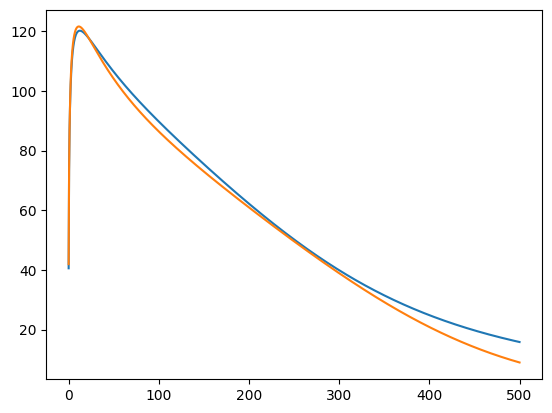

In [70]:
sigma_r = V_max*1.4393*(grid_r/a_MW)**0.354/(1+1.1756*(grid_r/a_MW)**0.752)*np.exp(-0.5*(grid_r/300)**2.5)
plt.plot(grid_r, grid_sig, label='sigma')
plt.plot(grid_r,sigma_r, label='sigma')

In [26]:
M_LMC = 1.7*(44+8.7)**2/8.7**2
print("M_LMC:", M_LMC)

M_LMC: 62.37802880169114


In [ ]:
m=2.
(G*para_MW.enclosedMass(m*a_MW)/m/a_MW)**0.5

206.5574628710102

In [20]:
M_LMC = 40
a_LMC = 8.7*(M_LMC/10)**0.6
para_LMC = agama.Density(type='Spheroid', mass=M_LMC, scaleRadius=a_LMC, gamma = 1,beta = 3, outerCutoffRadius=10*a_LMC)
print(para_LMC.enclosedMass(8.7))
# potential

1.7871593496148162


In [31]:
(233**2-182.228**2)*8.2/G

4.018597780724347

In [118]:
((1.+6.8*(1-np.exp(-8.2/3)*(1+8.2/3)))*G/8.2)**0.5

np.float64(179.61765040059927)

In [16]:
from scipy.special import erf
X_c = 1000
erf_term = erf(X_c) - 2 * X_c / np.sqrt(np.pi) * np.exp(-X_c**2)
print(erf_term)

1.0


In [230]:
import numpy as np

def calculate_cubic_four_points(x1, y1, x2, y2, x3, y3, x4, y4):
    # 构造矩阵 A 和向量 b
    A = np.array([
        [x1**3, x1**2, x1, 1],
        [x2**3, x2**2, x2, 1],
        [x3**3, x3**2, x3, 1],
        [x4**3, x4**2, x4, 1]
    ])
    b = np.array([y1, y2, y3, y4])
    
    # 解线性方程组 A * [a, b, c, d] = b
    coefficients = np.linalg.solve(A, b)
    return coefficients  # 返回 [a, b, c, d]

# 示例：三点 (1, 2), (2, 3), (3, 5)
x1, y1 = 0.5, 0.7768
x2, y2 = 1, 1
x3, y3 = 2, 1.4406
x4, y4 = 1.5, 1.221
a, b, c, d = calculate_cubic_four_points(x1, y1, x2, y2, x3, y3, x4, y4)
print(f"三次函数为: f(x) = {a:.2f}x^3 + {b:.2f}x^2 + {c:.2f}x + {d:.2f}")


三次函数为: f(x) = 0.00x^3 + -0.01x^2 + 0.46x + 0.55


In [231]:
x=0.6
f_x = a*x**3 + b*x**2 + c*x + d
print(f"f({x}) = {f_x:.2f}")

f(0.6) = 0.82


Text(0.5, 0, 'x')

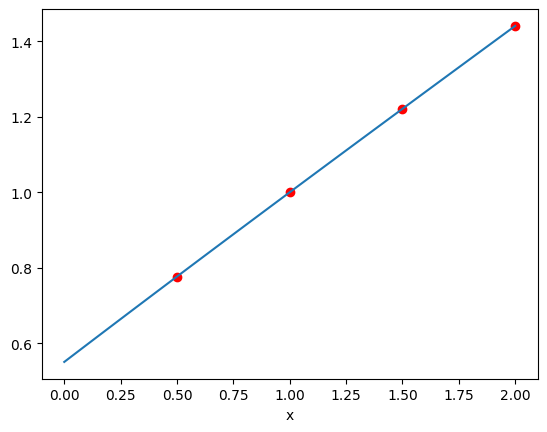

In [232]:
plot_x = np.linspace(0, 2, 100)
plot_y = a*plot_x**3 + b*plot_x**2 + c*plot_x + d
plt.plot(plot_x, plot_y, label='Cubic Polynomial')
plt.scatter([x1, x2, x3, x4], [y1, y2, y3, y4], color='red', label='Data Points')
plt.xlabel('x')

In [ ]:
np.log(1+5.3)- 5.3/6.3

np.float64(0.9992797921276456)

In [ ]:
a_LMC = 21
M_LMC = 1.7*(a_LMC+8.7)**2/8.7**2
print("M_LMC:", M_LMC)
LMCpot = agama.Potential(type='Dehnen', mass=M_LMC, scaleRadius=a_LMC, gamma = 1)
print(LMCpot.enclosedMass(50))

M_LMC: 19.811771700356722
9.825318240605396


In [76]:
def g_concen(c):
    return np.log(1+c) - c/(1+c)
a_halo = 16
M_MW = 4/g_concen(8.2/a_halo)
print("M_MW:", M_MW)
MWpot = agama.Potential(type='NFW', mass=M_MW,scaleRadius=a_halo)
para_MW = agama.Density(type='NFW', mass=M_MW, scaleRadius=a_halo)
df_halo = agama.DistributionFunction(potential=MWpot, type='QuasiSpherical', density=para_MW)
V_max = (G*para_MW.enclosedMass(2.2*a_halo)/2.2/a_halo)**0.5
print("V_max:", V_max)

M_MW: 53.3896161568165
V_max: 176.16770447693386


16


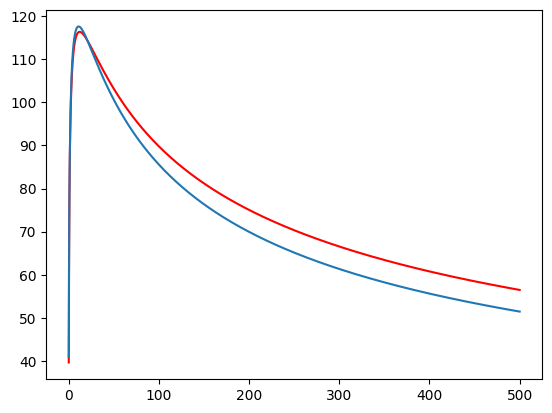

In [78]:
grid_r  = np.linspace(0.1, 500, 2000)  # 0.1 kpc to 100 kpc
grid_sig= agama.GalaxyModel(MWpot, df_halo).moments(
    np.column_stack((grid_r, grid_r*0, grid_r*0)), dens=False, vel=False, vel2=True)[:,0]**0.5
spl  = agama.Spline(grid_r, grid_sig)
sigma_r = 176*1.4393*(grid_r/a_halo)**0.354/(1+1.1756*(grid_r/a_halo)**0.752)
plt.plot(grid_r, grid_sig, label='sigma',color='red')
plt.plot(grid_r,sigma_r, label='sigma')
print(a_halo)